### Data analysis

Questions

- Em que momento houve maior distribuição de vacinas
- Porcentagem de homens e mulheres que tomaram vacinas por idade


In [28]:
import pandas as pd


vaccines_df = pd.read_csv('../data/covid19/campinas_2021_2022_2023_vaccines.csv')
vaccines_df['date'] = pd.to_datetime(vaccines_df['date'])

vaccines_df = vaccines_df[vaccines_df['vaccine'] != 'NULO']

vaccines_df.head()

date state         city   ibgeID  dose          vaccine sex    age  \
0 2021-01-17    SP  Campinas/SP  3509502     1          Sinovac   F  25-29   
1 2021-01-17    SP  Campinas/SP  3509502     1          Sinovac   F  50-54   
2 2021-01-17    SP  Campinas/SP  3509502     2  Pfizer/BioNTech   F  20-24   
3 2021-01-17    SP  Campinas/SP  3509502     2          Sinovac   F  55-59   
4 2021-01-18    SP  Campinas/SP  3509502     1          Sinovac   F  20-24   

   count  pop2021  
0      1  1223237  
1      1  1223237  
2      1  1223237  
3      1  1223237  
4      1  1223237

In [29]:
import plotly.express as px


for year in [2021, 2022, 2023]:
    vaccines_over_year_df = vaccines_df[vaccines_df['date'].dt.year ==
                                        year]['date'].value_counts().reset_index()
    vaccines_over_year_df.columns = ['date', 'count']

    vaccines_over_year_df = vaccines_over_year_df.sort_values(by='date')

    fig = px.bar(vaccines_over_year_df, x='date', y='count',
                 title=f'Vacinação em Campinas em {year}')
    fig.update_xaxes(title_text='Data')
    fig.update_yaxes(title_text='Vacinas por dia')

    fig.show()

In [30]:
vaccines_over_time_df = vaccines_df['date'].value_counts().reset_index()
vaccines_over_time_df.columns = ['date', 'count']

vaccines_over_time_df = vaccines_over_time_df.sort_values(by='date')

fig = px.bar(vaccines_over_time_df, x='date', y='count',
             title=f'Vacinação em Campinas ao longo do tempo')
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Vacinas por dia')
fig.show()

In [31]:
vaccines_df.head()

date state         city   ibgeID  dose          vaccine sex    age  \
0 2021-01-17    SP  Campinas/SP  3509502     1          Sinovac   F  25-29   
1 2021-01-17    SP  Campinas/SP  3509502     1          Sinovac   F  50-54   
2 2021-01-17    SP  Campinas/SP  3509502     2  Pfizer/BioNTech   F  20-24   
3 2021-01-17    SP  Campinas/SP  3509502     2          Sinovac   F  55-59   
4 2021-01-18    SP  Campinas/SP  3509502     1          Sinovac   F  20-24   

   count  pop2021  
0      1  1223237  
1      1  1223237  
2      1  1223237  
3      1  1223237  
4      1  1223237

In [32]:
vaccinations_per_day_df = vaccines_df['date'].value_counts().reset_index()
vaccinations_per_day_df.columns = ['date', 'count']
vaccinations_per_day_df = vaccinations_per_day_df.sort_values(by='date')


for year in [2021, 2022, 2023]:
    fig = px.line(vaccinations_per_day_df[vaccinations_per_day_df['date'].dt.year ==
                  year], x='date', y='count', title=f'Vacinação em Campinas em {year}')

    fig.update_xaxes(title_text='Data')
    fig.update_yaxes(title_text='Contagem')
    fig.show()

In [33]:
fig = px.line(vaccinations_per_day_df, x='date', y='count', title='Vacinação em Campinas ao longo do tempo')

fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Contagem')
fig.show()

In [34]:
vaccine_types = vaccines_df['vaccine'].value_counts().reset_index()
vaccine_types.columns = ['vaccine_type', 'count']
vaccine_types['vaccine_types_percentage'] = (
    vaccine_types['count'] / vaccine_types['count'].sum()) * 100

pie = px.pie(vaccine_types, names='vaccine_type',
             values='vaccine_types_percentage', title='Distribuição das vacinas')
pie.update_traces(textinfo='percent+label')
pie.update_layout(showlegend=False)

bar = px.bar(vaccine_types, x='vaccine_type',
             y='vaccine_types_percentage', title='Distribuição das vacinas')
bar.update_xaxes(title_text='Vacina')
bar.update_yaxes(title_text='Porcentagem')

pie.show()
bar.show()

In [35]:
# todo: take a further look at the data, since total_vaccines is way lower than what it should be
# vaccines_df['percentage_vaccinated_over_time'] = vaccines_df['total_vaccines'] / vaccines_df['pop2021']

# fig = px.line(vaccines_df, x='date', y='percentage_vaccinated_over_time',
#        title='Porcentagem vacinada ao longo do tempo')
# fig.update_xaxes(dtick='M1', title_text='Data')
# fig.update_yaxes(title_text='Porcentagem vacinada')
# fig.show()

In [36]:
cases_df = pd.read_csv('../data/covid19/campinas_2020_2021_2022_cases.csv')

cases_df['date'] = pd.to_datetime(cases_df['date'])

cases_df.head()

epi_week       date state         city   ibgeID  newDeaths  deaths  \
0        12 2020-03-18    SP  Campinas/SP  3509502          0       0   
1        12 2020-03-19    SP  Campinas/SP  3509502          0       0   
2        12 2020-03-20    SP  Campinas/SP  3509502          0       0   
3        12 2020-03-21    SP  Campinas/SP  3509502          0       0   
4        13 2020-03-22    SP  Campinas/SP  3509502          0       0   

   newCases  totalCases  deaths_per_100k_inhabitants  \
0         1           1                          0.0   
1         0           1                          0.0   
2         0           1                          0.0   
3         0           1                          0.0   
4         0           1                          0.0   

   totalCases_per_100k_inhabitants  deaths_by_totalCases  
0                            0.082                   0.0  
1                            0.082                   0.0  
2                            0.082                   0.0  
3                            0.082                   0.0  
4                            0.082                   0.0

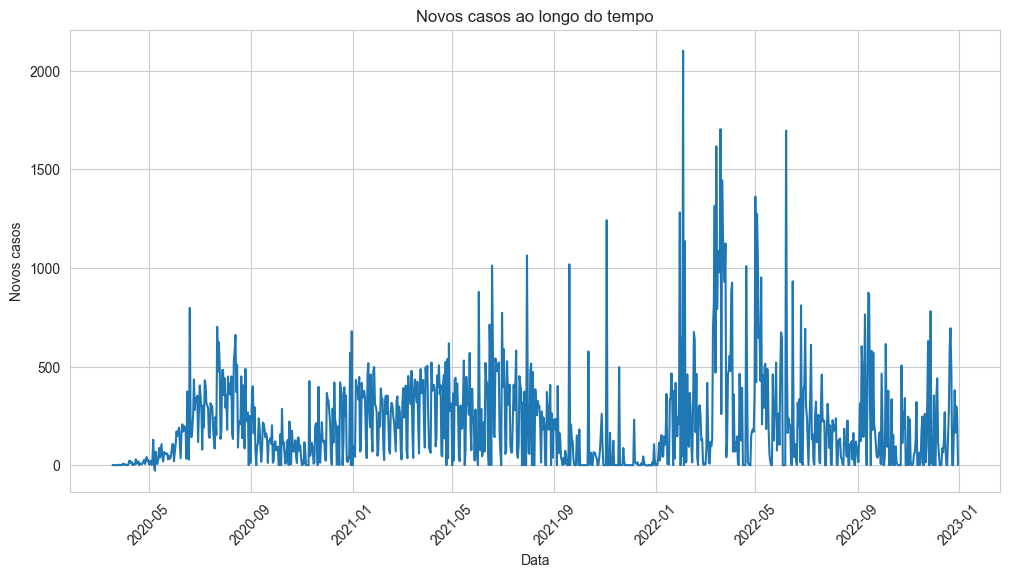

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='newCases', data=cases_df)
plt.title('Novos casos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Novos casos')
plt.xticks(rotation=45)
plt.show()


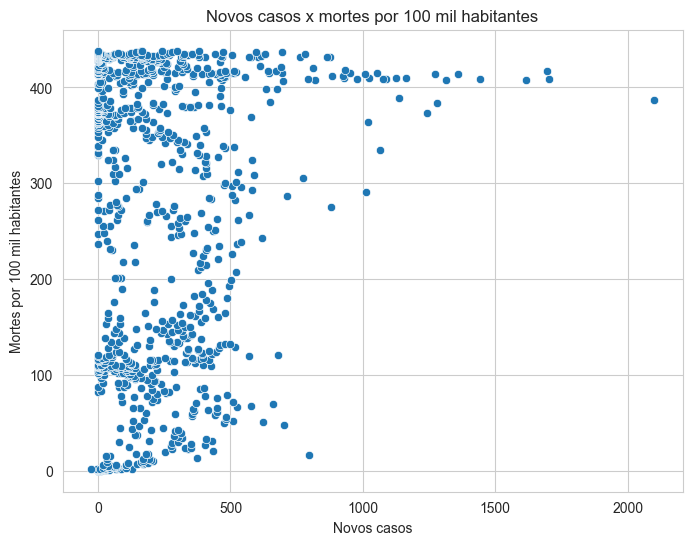

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='newCases', y='deaths_per_100k_inhabitants', data=cases_df)
plt.title('Novos casos x mortes por 100 mil habitantes')
plt.xlabel('Novos casos')
plt.ylabel('Mortes por 100 mil habitantes')
plt.show()


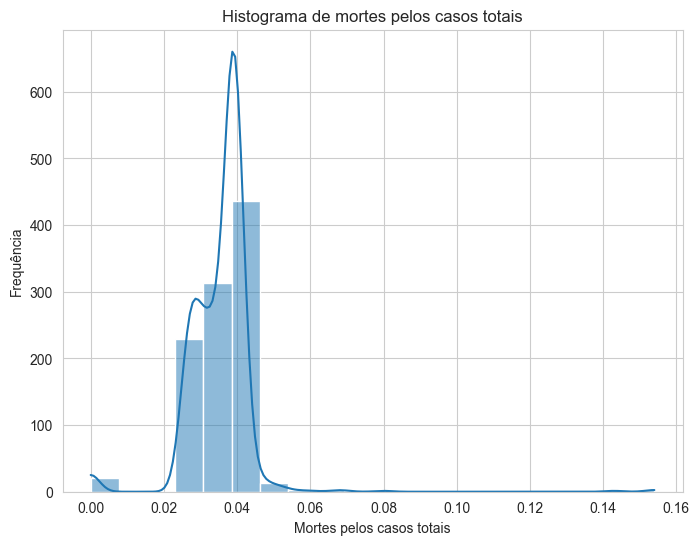

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(cases_df['deaths_by_totalCases'], bins=20, kde=True)
plt.title('Histograma de mortes pelos casos totais')
plt.xlabel('Mortes pelos casos totais')
plt.ylabel('Frequência')
plt.show()

In [40]:
combined_df = pd.merge(cases_df, vaccines_df, on=['date', 'state', 'city', 'ibgeID'], how='inner')
combined_df_2022 = combined_df[combined_df['date'].dt.year == 2022]

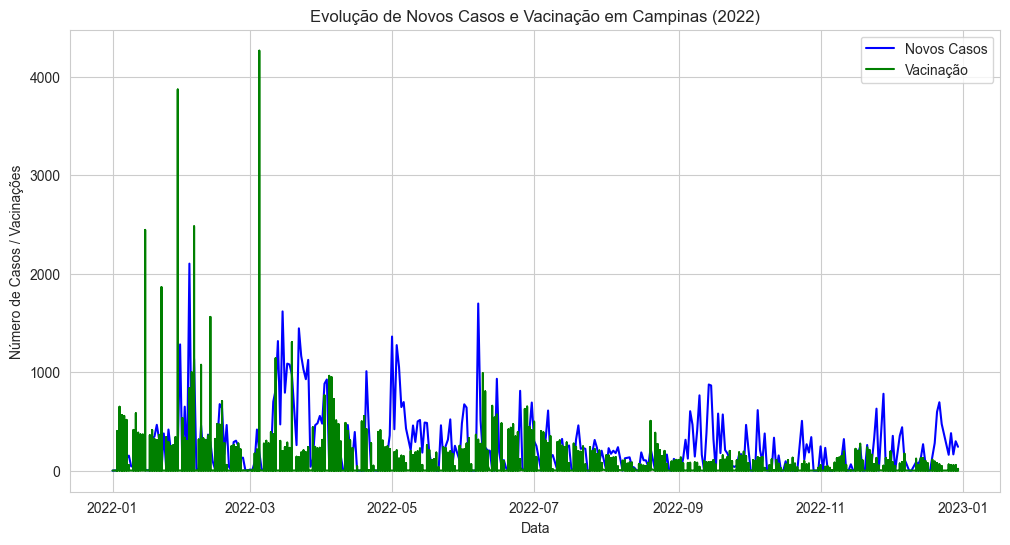

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(combined_df_2022['date'], combined_df_2022['newCases'], label='Novos Casos', color='b')
plt.plot(combined_df_2022['date'], combined_df_2022['count'], label='Vacinação', color='g')
plt.title('Evolução de Novos Casos e Vacinação em Campinas (2022)')
plt.xlabel('Data')
plt.ylabel('Número de Casos / Vacinações')
plt.legend()
plt.show()


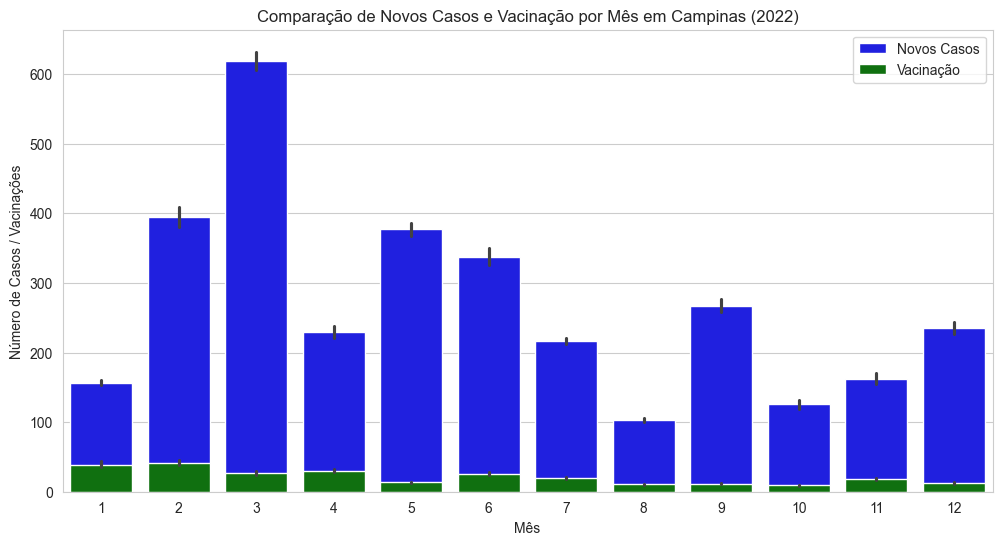

In [42]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df_2022, x=combined_df_2022['date'].dt.month, y=combined_df_2022['newCases'], label='Novos Casos', color='b')
sns.barplot(data=combined_df_2022, x=combined_df_2022['date'].dt.month, y=combined_df_2022['count'], label='Vacinação', color='g')
plt.title('Comparação de Novos Casos e Vacinação por Mês em Campinas (2022)')
plt.xlabel('Mês')
plt.ylabel('Número de Casos / Vacinações')
plt.legend()
plt.show()


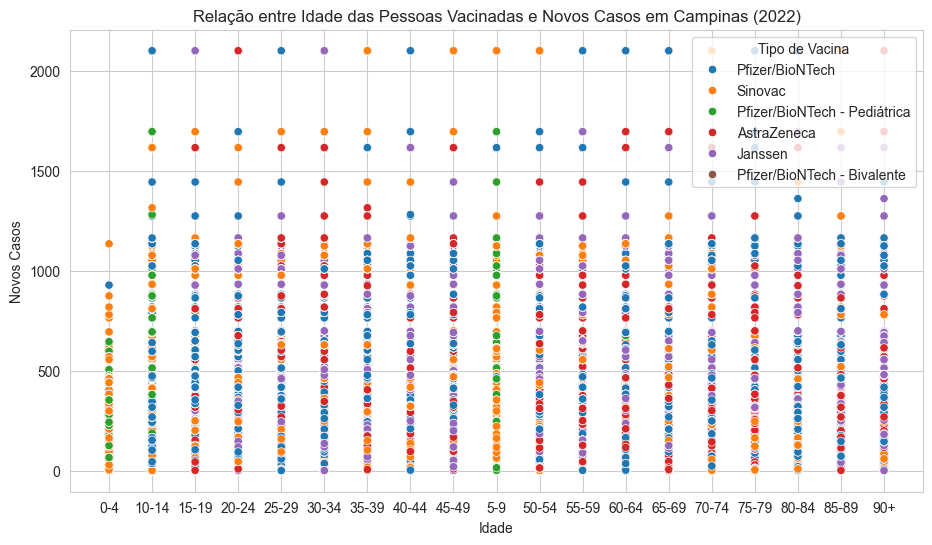

In [43]:
combined_df_2022 = combined_df_2022.sort_values(by='age')

plt.figure(figsize=(11, 6))
sns.scatterplot(x='age', y='newCases', data=combined_df_2022, hue='vaccine')
plt.title('Relação entre Idade das Pessoas Vacinadas e Novos Casos em Campinas (2022)')
plt.xlabel('Idade')
plt.ylabel('Novos Casos')
plt.legend(title='Tipo de Vacina')
plt.show()

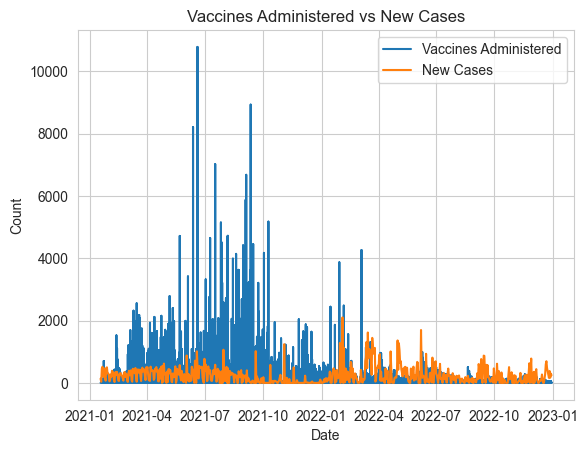

In [44]:
plt.plot(combined_df['date'], combined_df['count'], label='Vaccines Administered')
plt.plot(combined_df['date'], combined_df['newCases'], label='New Cases')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Vaccines Administered vs New Cases')
plt.legend()
plt.show()


In [45]:
fig = px.scatter(combined_df, x='newCases', y='count', trendline='ols')
fig.update_layout(title='Correlação entre novos casos vacinas administradas',
                  xaxis_title='Novos casos',
                  yaxis_title='Vacinas administradas')
fig.show()

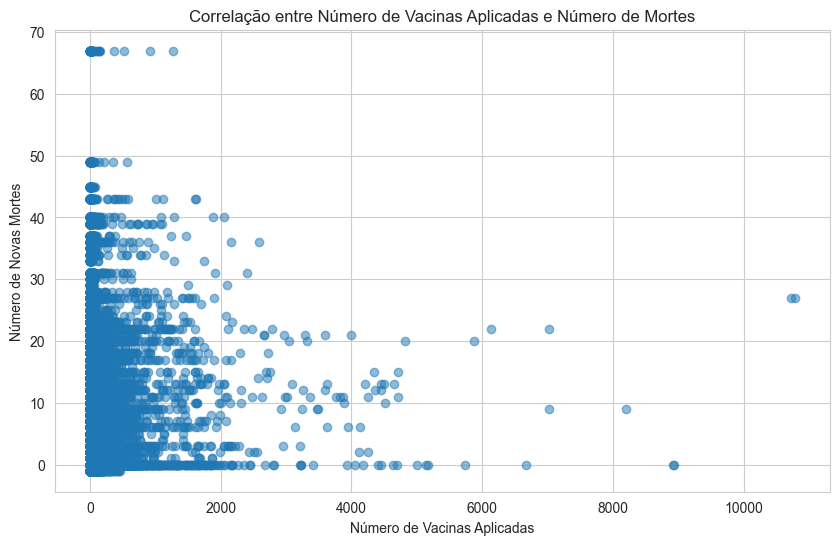

In [46]:
correlation = combined_df['count'].corr(combined_df['newDeaths'])


plt.figure(figsize=(10, 6))
plt.scatter(combined_df['count'], combined_df['newDeaths'], alpha=0.5)
plt.title(f'Correlação entre Número de Vacinas Aplicadas e Número de Mortes')
plt.xlabel('Número de Vacinas Aplicadas')
plt.ylabel('Número de Novas Mortes')
plt.grid(True)

plt.show()

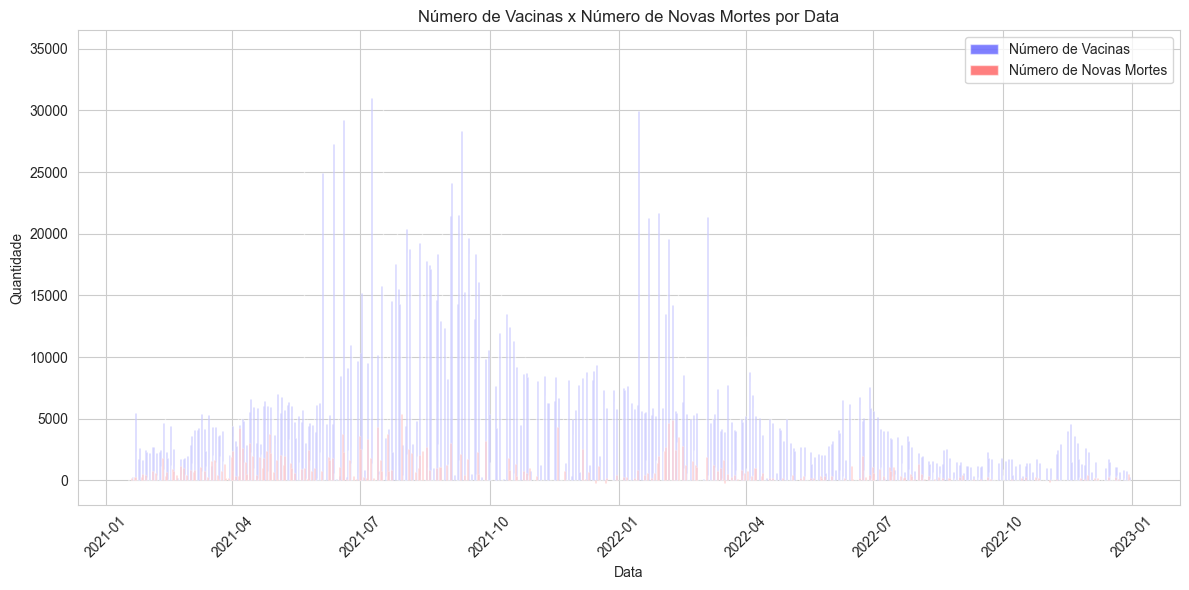

In [47]:
data_grouped = combined_df.groupby('date').agg({'count': 'sum', 'newDeaths': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(data_grouped['date'], data_grouped['count'], width=0.4, label='Número de Vacinas', align='center', color='blue', alpha=0.5)
plt.bar(data_grouped['date'], data_grouped['newDeaths'], width=0.4, label='Número de Novas Mortes', align='edge', color='red', alpha=0.5)
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.title('Número de Vacinas x Número de Novas Mortes por Data')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

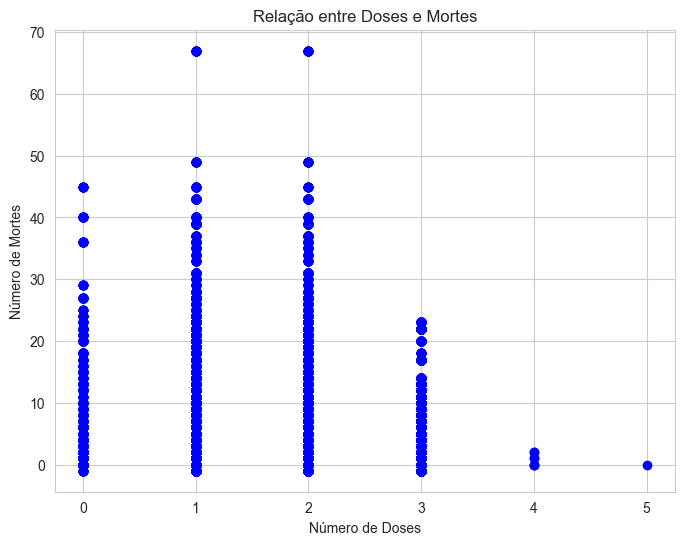

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['dose'], combined_df['newDeaths'], c='b', marker='o')
plt.xlabel('Número de Doses')
plt.ylabel('Número de Mortes')
plt.title('Relação entre Doses e Mortes')
plt.grid(True)

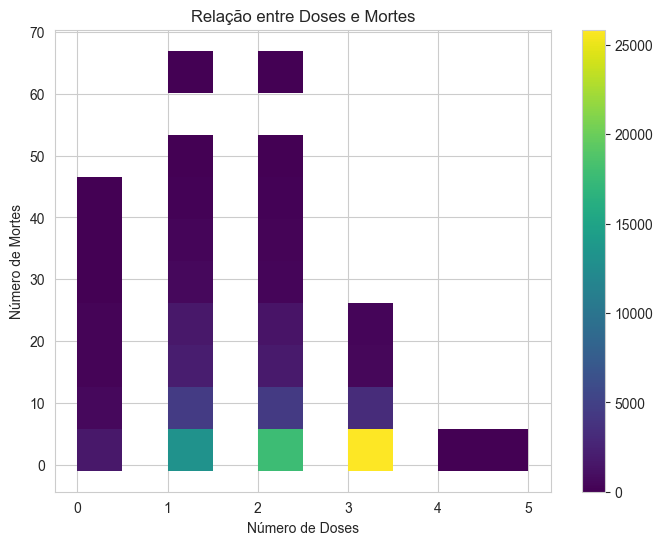

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x='dose', y='newDeaths', cbar=True, cmap='viridis', bins=10, kde=True)
plt.xlabel('Número de Doses')
plt.ylabel('Número de Mortes')
plt.title('Relação entre Doses e Mortes')
plt.show()

In [50]:
import numpy as np

simulated_data = combined_df.copy()

noise_factor = 0.6

noise_newDeaths = np.random.normal(scale=noise_factor * combined_df['newDeaths'].std(), size=len(combined_df))
noise_totalDeaths = np.random.normal(scale=noise_factor * combined_df['deaths'].std(), size=len(combined_df))
noise_newCases = np.random.normal(scale=noise_factor * combined_df['newCases'].std(), size=len(combined_df))
noise_totalCases = np.random.normal(scale=noise_factor * combined_df['totalCases'].std(), size=len(combined_df))
noise_deaths_by_totalCases = np.random.normal(scale=noise_factor * combined_df['deaths_by_totalCases'].std(), size=len(combined_df))
noise_deaths_per_100k_inhabitants = np.random.normal(scale=noise_factor * combined_df['deaths_per_100k_inhabitants'].std(), size=len(combined_df))

simulated_data['newDeaths'] = combined_df['newDeaths'] + np.abs(noise_newDeaths)
simulated_data['deaths'] = combined_df['deaths'] + np.abs(noise_totalDeaths)
simulated_data['newCases'] = combined_df['newCases'] + np.abs(noise_newCases)
simulated_data['totalCases'] = combined_df['totalCases'] + np.abs(noise_totalCases)
simulated_data['deaths_by_totalCases'] = combined_df['deaths_by_totalCases'] + np.abs(noise_deaths_by_totalCases)
simulated_data['deaths_per_100k_inhabitants'] = combined_df['deaths_per_100k_inhabitants'] + np.abs(noise_deaths_per_100k_inhabitants)


In [59]:
simulated_data.head()

epi_week       date state         city   ibgeID  newDeaths       deaths  \
0       103 2021-01-17    SP  Campinas/SP  3509502   9.820843  1813.785650   
1       103 2021-01-17    SP  Campinas/SP  3509502   9.620653  2042.761047   
2       103 2021-01-17    SP  Campinas/SP  3509502  12.170566  1621.265339   
3       103 2021-01-17    SP  Campinas/SP  3509502   7.984576  2507.951304   
4       103 2021-01-18    SP  Campinas/SP  3509502   3.534243  1605.375143   

     newCases     totalCases  deaths_per_100k_inhabitants  \
0  358.313449  100735.892845                   137.361004   
1  208.099068   66493.012345                   188.070431   
2  173.334065   52902.492225                   139.721238   
3  504.409079   54683.168045                   152.313935   
4  274.846184   53849.964318                   131.013703   

   totalCases_per_100k_inhabitants  deaths_by_totalCases  dose  \
0                         3902.024              0.036386     1   
1                         3902.024              0.035148     1   
2                         3902.024              0.036469     2   
3                         3902.024              0.034692     2   
4                         3904.967              0.036432     1   

           vaccine sex    age  count  pop2021  
0          Sinovac   F  25-29      1  1223237  
1          Sinovac   F  50-54      1  1223237  
2  Pfizer/BioNTech   F  20-24      1  1223237  
3          Sinovac   F  55-59      1  1223237  
4          Sinovac   F  20-24      1  1223237

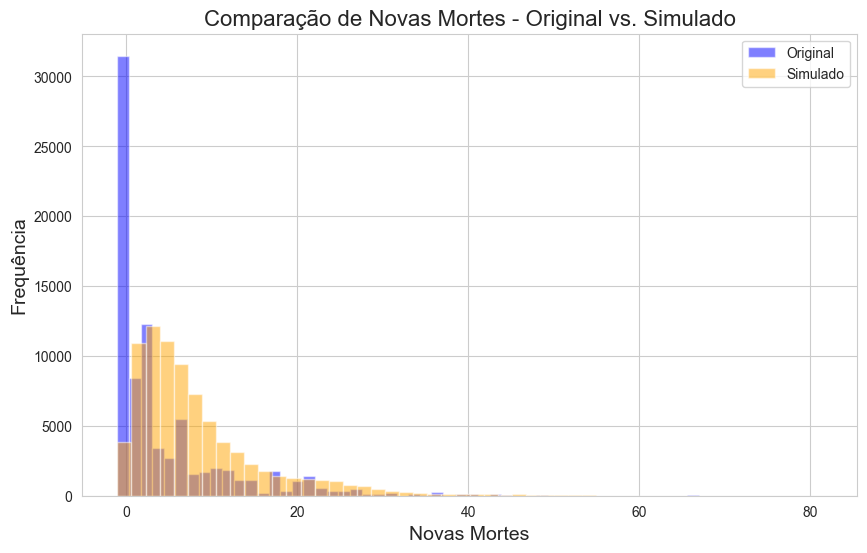

In [51]:
plt.figure(figsize=(10, 6))

plt.hist(combined_df['newDeaths'], bins=50, alpha=0.5, color='blue', label='Original')
plt.hist(simulated_data['newDeaths'], bins=50, alpha=0.5, color='orange', label='Simulado')

plt.title('Comparação de Novas Mortes - Original vs. Simulado', fontsize=16)
plt.xlabel('Novas Mortes', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.legend()

plt.show()

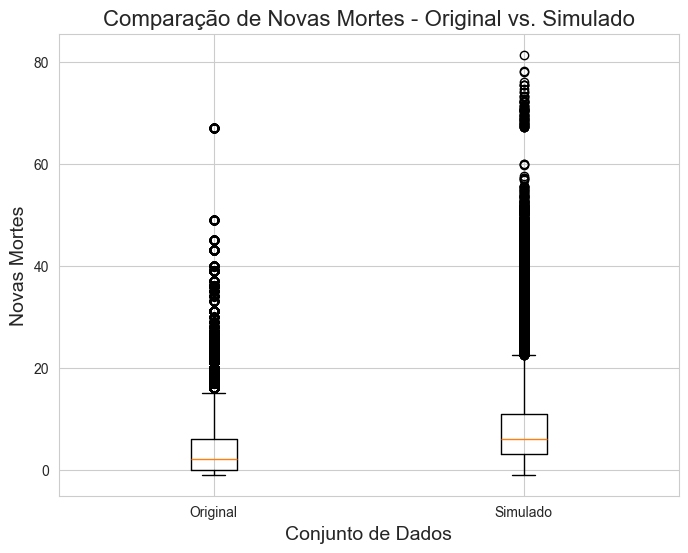

In [52]:
plt.figure(figsize=(8, 6))

plt.boxplot([combined_df['newDeaths'], simulated_data['newDeaths']], labels=['Original', 'Simulado'])

plt.title('Comparação de Novas Mortes - Original vs. Simulado', fontsize=16)
plt.xlabel('Conjunto de Dados', fontsize=14)
plt.ylabel('Novas Mortes', fontsize=14)

plt.show()

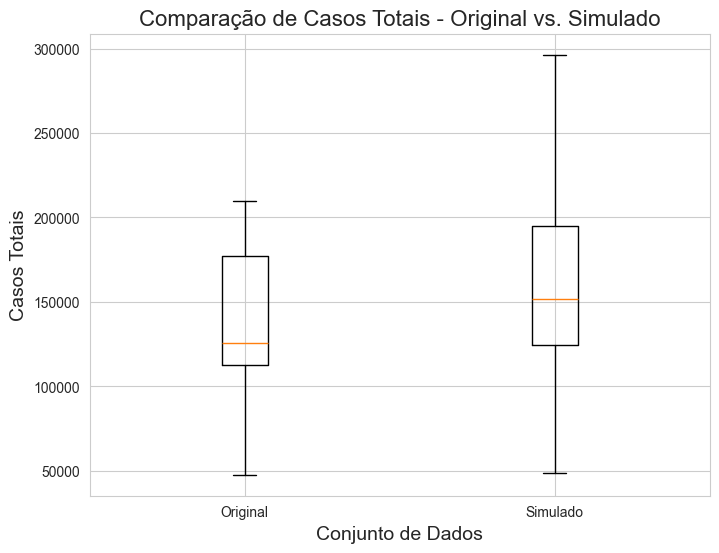

In [53]:
plt.figure(figsize=(8, 6))

plt.boxplot([combined_df['totalCases'], simulated_data['totalCases']], labels=['Original', 'Simulado'])

plt.title('Comparação de Casos Totais - Original vs. Simulado', fontsize=16)
plt.xlabel('Conjunto de Dados', fontsize=14)
plt.ylabel('Casos Totais', fontsize=14)

plt.show()

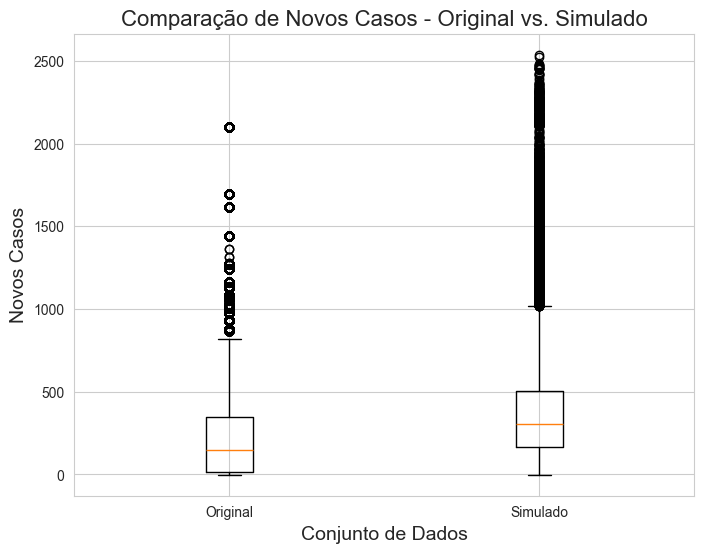

In [54]:
plt.figure(figsize=(8, 6))

plt.boxplot([combined_df['newCases'], simulated_data['newCases']], labels=['Original', 'Simulado'])

plt.title('Comparação de Novos Casos - Original vs. Simulado', fontsize=16)
plt.xlabel('Conjunto de Dados', fontsize=14)
plt.ylabel('Novos Casos', fontsize=14)

plt.show()

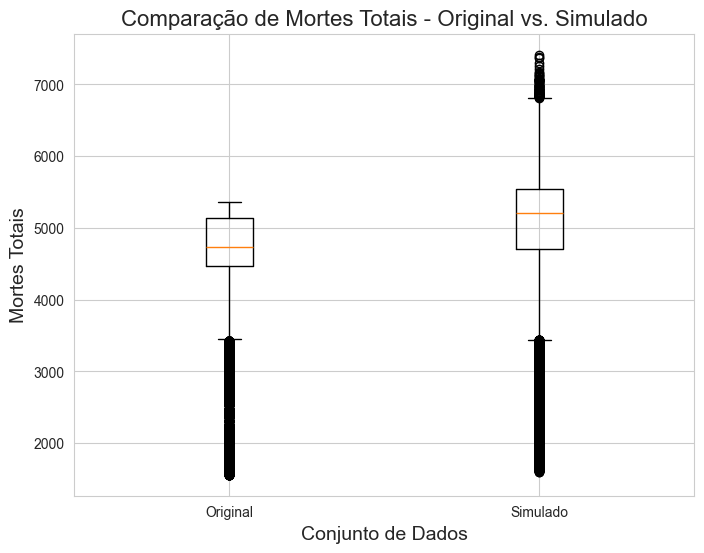

In [55]:
plt.figure(figsize=(8, 6))

plt.boxplot([combined_df['deaths'], simulated_data['deaths']], labels=['Original', 'Simulado'])

plt.title('Comparação de Mortes Totais - Original vs. Simulado', fontsize=16)
plt.xlabel('Conjunto de Dados', fontsize=14)
plt.ylabel('Mortes Totais', fontsize=14)

plt.show()

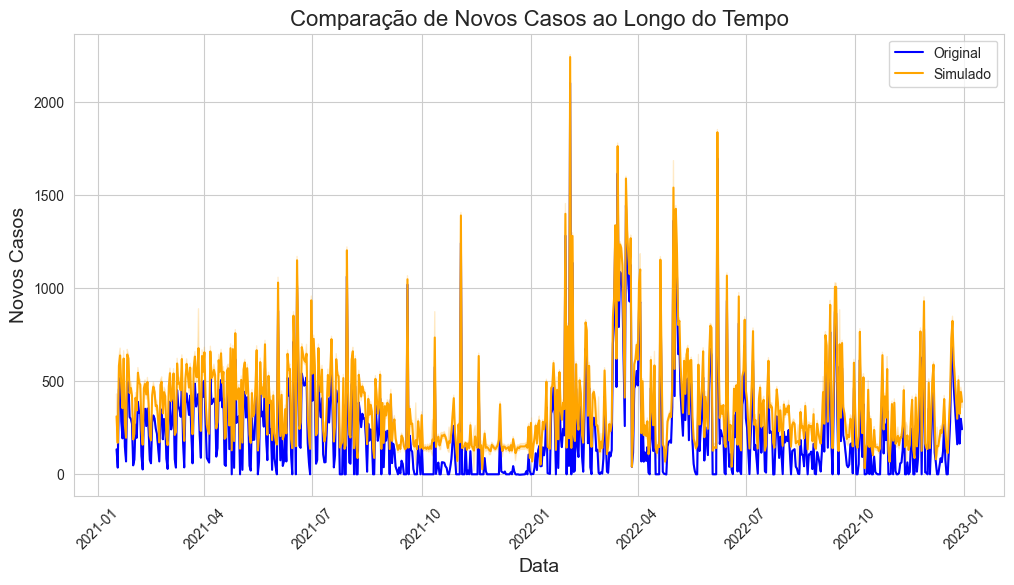

In [56]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))

sns.lineplot(x='date', y='newCases', data=combined_df, label='Original', color='blue')

sns.lineplot(x='date', y='newCases', data=simulated_data, label='Simulado', color='orange')

plt.title('Comparação de Novos Casos ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Novos Casos', fontsize=14)
plt.xticks(rotation=45)

plt.legend()

plt.show()

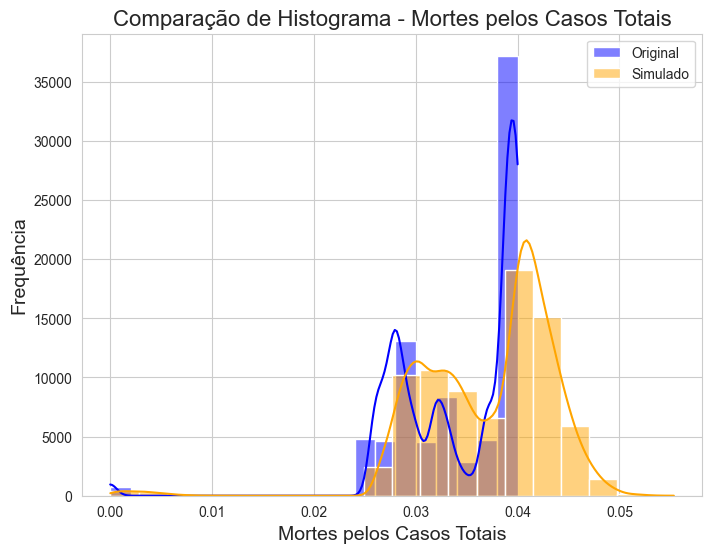

In [57]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))

sns.histplot(combined_df['deaths_by_totalCases'], bins=20, kde=True, label='Original', color='blue')

sns.histplot(simulated_data['deaths_by_totalCases'], bins=20, kde=True, label='Simulado', color='orange')

plt.title('Comparação de Histograma - Mortes pelos Casos Totais', fontsize=16)
plt.xlabel('Mortes pelos Casos Totais', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.legend()

plt.show()

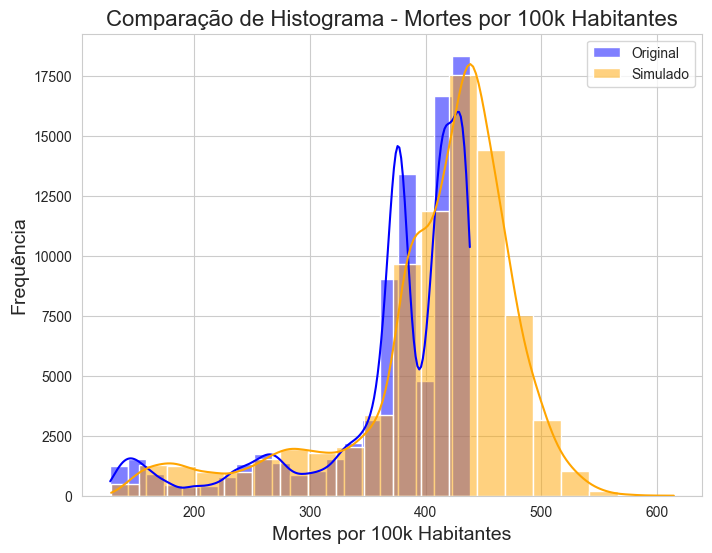

In [58]:
plt.figure(figsize=(8, 6))

sns.histplot(combined_df['deaths_per_100k_inhabitants'], bins=20, kde=True, label='Original', color='blue')
sns.histplot(simulated_data['deaths_per_100k_inhabitants'], bins=20, kde=True, label='Simulado', color='orange', alpha=0.5)

plt.title('Comparação de Histograma - Mortes por 100k Habitantes', fontsize=16)
plt.xlabel('Mortes por 100k Habitantes', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.legend()

plt.show()
